# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-верно-ли-рассчитана-эффективность-обогащения" data-toc-modified-id="Проверим,-верно-ли-рассчитана-эффективность-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, верно ли рассчитана эффективность обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Проведём-предобработку-данных" data-toc-modified-id="Проведём-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведём предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Реализуем-функцию-для-вычисления-sMAPE" data-toc-modified-id="Реализуем-функцию-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Реализуем функцию для вычисления sMAPE</a></span></li><li><span><a href="#Обучим-модели" data-toc-modified-id="Обучим-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим модели</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

Для начала импортируем нужные модули и библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

Загрузим данные в соответствующие переменные

In [2]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except FileNotFoundError as e:
    print(f"[FileNotFoundError]: {e.strerror}, filename: {e.filename}")

try:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
except FileNotFoundError as e:
    print(f"[FileNotFoundError]: {e.strerror}, filename: {e.filename}")
try:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except FileNotFoundError as e:
    print(f"[FileNotFoundError]: {e.strerror}, filename: {e.filename}")

Посмотрим, как выглядят наши датасеты. Откроем первые 10 строк для каждого

In [3]:
# получение первых 10 строк обучающей выборки
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
# получение первых 10 строк тестовой выборки
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [5]:
# получение первых 10 строк общей выборки
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Теперь посмотрим общую информацию о таблицах - названия колонок, количество ненулевых значений, типы данных и т.п.

In [6]:
# получение общей информации о таблице обучающей выборки
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
# получение общей информации о таблице тестовой выборки
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
# получение общей информации о таблице общей выборки
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**
    
Видим ряд проблем:
 * в данных много пропусков
 * дата имеет тип данных object, хотя по факту является datetime
 * в train присутствуют те данные, которых нет в test

Преобразуем дату к типу datetime

In [9]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M')

### Проверим, верно ли рассчитана эффективность обогащения

*Эффективность обогащения рассчитывается по формуле:*

$Recovery = \frac{C \times (F - T)}{F \times (C - T)} \times 100\%$

*Где:*
 * C — доля золота в концентрате после флотации/очистки;
 * F — доля золота в сырье/концентрате до флотации/очистки;
 * T — доля золота в отвальных хвостах после флотации/очистки.

Реализуем функцию подсчёта эффективности обогащения для признака rougher.output.recovery на обучающей выборке.

In [10]:
def calculate_recovery(C, F, T):
    '''
    Фунция принимает на вход три числа
     * C — доля золота в концентрате после флотации/очистки;
     * F — доля золота в сырье/концентрате до флотации/очистки;
     * T — доля золота в отвальных хвостах после флотации/очистки.
     И возвращает, посчитанную для них эффективность обучения
    '''
    return ((C * (F - T)) / (F * (C - T))) * 100

def calculate_recovery_df(df):
    '''
    Функция принимает на вход датафрейм. 
    Присваивает переменным С, F и T соответствующие столбцы датафрейма. 
    Затем вызывает функцию calculate_recovery, реализованную ранее
    и возвращает её результат
    '''
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    
    return calculate_recovery(C, F, T)

Создадим датафрейм для проверки. Сделаем срез обучающей выборки только с теми колонками, которые нам понадобятся, чтобы проверить, верно ли посчитано 'rougher.output.recovery'. Уберём пропуски и применим к получившемуся датафрейму написанную раннее функцию для подсчёта эффективности обогащения. 
Затем посчитаем среднюю абсолютную ошибку для посчитанных нами через функцию данных и данных, имеющихся у нас в выборке. 

In [11]:
columns = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']
df_train_for_check = df_train[columns]
df_train_for_check = df_train_for_check.dropna()
df_train_for_check['rougher.output.recovery_calculated'] = df_train_for_check.apply(calculate_recovery_df, axis=1)
mae = mean_absolute_error(df_train_for_check['rougher.output.recovery'], df_train_for_check['rougher.output.recovery_calculated'])
print("MAE между расчётами и значением признака:", mae)

MAE между расчётами и значением признака: 9.73512347450521e-15


Мы видим, что mae совсем низкая. Убедимся, что расччитанные нами значения и значения признака имеют схожие распределения. 
Построим гистограммы. 

Распределение значения признака на обучающей выборке


<AxesSubplot:xlabel='rougher.output.recovery', ylabel='Count'>

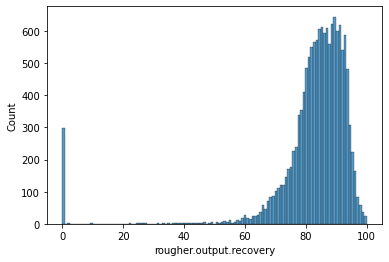

In [12]:
print('Распределение значения признака на обучающей выборке')
sns.histplot(data=df_train, x="rougher.output.recovery")

Распределение посчитанных с помощью функции значений


<AxesSubplot:xlabel='rougher.output.recovery_calculated', ylabel='Count'>

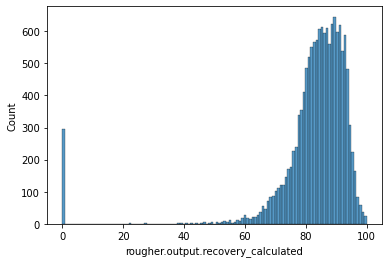

In [13]:
print('Распределение посчитанных с помощью функции значений')
sns.histplot(data=df_train_for_check, x="rougher.output.recovery_calculated")

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**

Распределения практически не отличаются, погрешность минимальна, значит, можно предположить, что данные рассчитаны верно

### Проанализируем признаки, недоступные в тестовой выборке

Посмотрим, какие столбцы встречаются в обучающей выборке, но отсутствуют в тестовой. Посмотрим на первые 5 строк получившегося среза

In [14]:
only_train_cols = df_train.columns.drop(df_test.columns)
print("Столбцы, встречающиеся только в обучающей выборке:\n\n", list(df_train[only_train_cols].columns))

Столбцы, встречающиеся только в обучающей выборке:

 ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tai

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**

Признаки, недоступные на тестовой выборке - это либо те признаки, которые можно посчитать, либо те, которые являются итоговым результатом прохождения этапов

### Проведём предобработку данных

Удалим из обучающей выборки все признаки, которых нет в тесте, за исключением целевых признаков - 'final.output.recovery' и 'rougher.output.recovery'. 

In [15]:
cols_to_drop = only_train_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
right_cols = df_train.columns.drop(cols_to_drop)
df_train = df_train[right_cols]

Добавим целевые признаки в test. Возьмём их из общего датасета и с помощью метода join присоединим к тестовой выборке. В качестве индекса будем использовать дату

In [16]:
target_features_to_join = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
df_test = df_test.join(target_features_to_join.set_index('date'), on='date')

Избавимся от значений NaN в целевых признаках обеих выборок - такие данные не несут пользы.

In [17]:
df_train.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)
df_test.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'], inplace = True)

In [18]:
df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

Посмотрим на размеры получившихся выборок

In [19]:
print(df_train.shape)
print(df_test.shape)

(14149, 55)
(5290, 55)


Проверим, где остались пропуски в данных. Для примера откроем обучающую выборку.

In [20]:
df_train.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


Поскольку мы знаем, что соседние по времени параметры часто похожи, заполним пропуски методом 'ffill'

In [21]:
df_train = df_train.fillna(method='ffill')

In [22]:
df_full = df_full.fillna(method='ffill')

Удалим дубликаты, если вдруг они появились

In [23]:
df_train = df_train.drop_duplicates(subset=None, keep="first")
df_full = df_full.drop_duplicates(subset=None, keep="first")

<div style="border:solid blue 2px; padding: 20px">

**Выводы**

 * Мы провели предобработку данных, удалив дубликаты и заполнив пропуски предыдущим значением
 * Выяснили, что данные посчитаны верно
 * И в обучающей выборке из признаков, недоступных на тесте, оставили только целевые, которые в тест добавили из общего датасета

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Для начала подготовим датасеты с необходимыми признаками для каждого из данных металлов.

In [24]:
#подготовка датасета для золота
au_df = (df_full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']].copy())

In [25]:
#подготовка датасета для серебра
ag_df = (df_full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']].copy())

In [26]:
#подготовка датасета для свинца
pb_df = (df_full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']].copy())

In [27]:
#напишем функцию, которая будет рисовать данные всех четырех столбцов на одном графике
def draw_hist (df, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in df:
        df[col].hist(alpha=.5) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

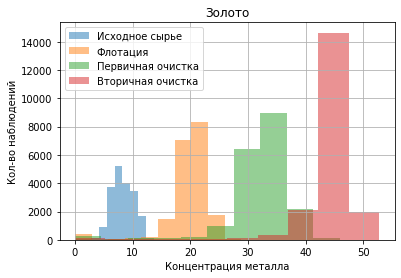

In [28]:
draw_hist(au_df, 'Золото')

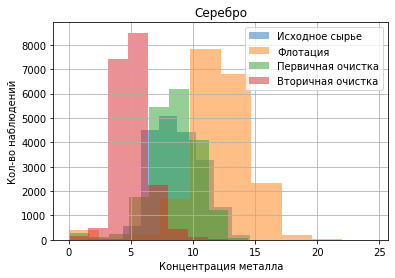

In [29]:
draw_hist(ag_df, 'Серебро')

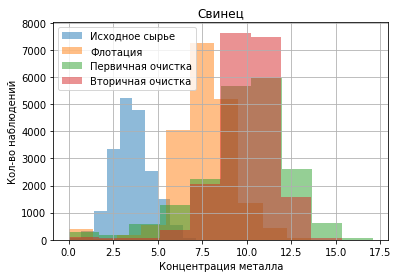

In [30]:
draw_hist(pb_df, 'Свинец')

<div style="border:solid blue 2px; padding: 20px">

**Промежуточные выводы**

 * Концентрация золота стабильно растёт с каждым этапом 
 * Концентрация серебра наоборот убывает
 * Концентрация свинца при первичной и вторичной обработке не сильно различается
 * Для каждого из матллов встречаются нулевые значения

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

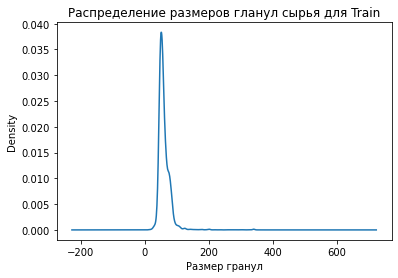

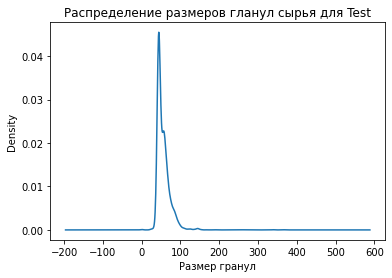

In [31]:
df_dict = {"Train": df_train, "Test": df_test}
#feed_size_fields = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

for key in df_dict:
    df = df_dict[key]
    title = 'Распределение размеров гланул сырья для ' + key
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Размер гранул')

    #df['rougher.input.feed_size'].plot(kind='hist', bins=200, range=(0,100), figsize=(16,8), ax=ax, legend=True, alpha=0.5)
    df['rougher.input.feed_size'].plot.kde()


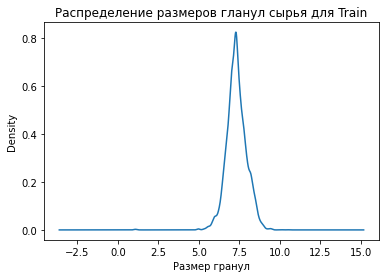

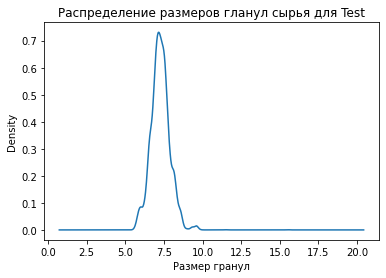

In [32]:
df_dict = {"Train": df_train, "Test": df_test}
#feed_size_fields = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

for key in df_dict:
    df = df_dict[key]
    title = 'Распределение размеров гланул сырья для ' + key
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Размер гранул')
    #df['primary_cleaner.input.feed_size'].plot(kind='hist', bins=200, range=(0,100), figsize=(16,8), ax=ax, legend=True, alpha=0.5)
    df['primary_cleaner.input.feed_size'].plot.kde()

Распределение размеров гранул сырья на этапе флотации и для обучающей и для тестовой выборке немного смещено вправо, а для этапа первичной обработки оно скорее симметричное для обоих выборок

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Cоздадим новый датасет с данныим о концентрации веществ и просуммируем их на разных стадиях

In [33]:
concentration_df = df_full[['date','rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].copy()
concentration_df['conc_sum_rougher'] = concentration_df['rougher.input.feed_ag'] + concentration_df['rougher.input.feed_pb'] + concentration_df['rougher.input.feed_sol'] + concentration_df['rougher.input.feed_au']
concentration_df['conc_sum_primary'] = concentration_df['primary_cleaner.output.concentrate_ag'] + concentration_df['primary_cleaner.output.concentrate_pb'] + concentration_df['primary_cleaner.output.concentrate_sol'] + concentration_df['primary_cleaner.output.concentrate_au']
concentration_df['conc_sum_final'] = concentration_df['final.output.concentrate_ag'] + concentration_df['final.output.concentrate_pb'] + concentration_df['final.output.concentrate_sol'] + concentration_df['final.output.concentrate_au']

Построим гистограммы для суммарных концентраций веществ

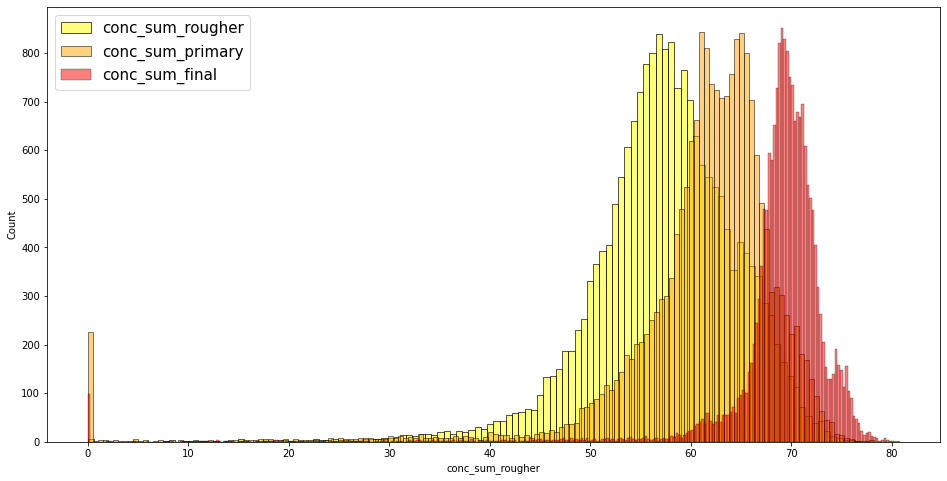

In [34]:
f, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=concentration_df, x="conc_sum_rougher", alpha=.5, color='yellow', label='conc_sum_rougher')
sns.histplot(data=concentration_df, x="conc_sum_primary", alpha=.5, color='orange', label='conc_sum_primary')
sns.histplot(data=concentration_df, x="conc_sum_final", alpha=.5, color='red', label='conc_sum_final')
plt.legend(fontsize = 15);

Заметим, что встречается довольно много нулевых значений. Изучим них. 

Для начала создадим датасет с этими аномальными наблюдениями.

In [35]:
values_0 = (concentration_df[['date', 'conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final']]
           .copy()
           .query('conc_sum_rougher == 0 or conc_sum_primary == 0 or conc_sum_final == 0')
           .fillna(0))

Посмотрим на первые 5 значений "странного" датасета

In [36]:
values_0.head()

,date,conc_sum_rougher,conc_sum_primary,conc_sum_final
19,2016-01-15 19:00:00,56.005644,0.0,64.546766
22,2016-01-15 22:00:00,56.038252,0.0,64.554911
30,2016-01-16 06:00:00,57.764677,0.0,63.765751
71,2016-01-18 01:00:00,56.626743,0.0,65.773298
74,2016-01-18 04:00:00,56.369424,0.0,59.902215


Избавимся от подобных значений в тестовой выборке

In [37]:
df_test = df_test.join(values_0.set_index('date'), on='date')

In [38]:
df_test[['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final']] = (df_test[['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final']]
                                                                    .fillna(-1))

In [39]:
df_test = df_test.query('conc_sum_rougher == -1 and conc_sum_primary == -1 and conc_sum_final == -1')

Проверим, что значения всех признаков -1

<AxesSubplot:>

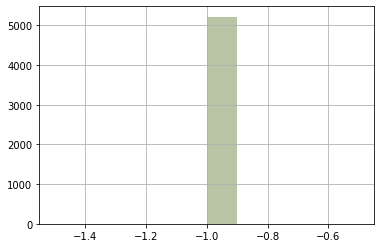

In [40]:
df_test['conc_sum_rougher'].hist(alpha=.2)
df_test['conc_sum_primary'].hist(alpha=.2)
df_test['conc_sum_final'].hist(alpha=.2)

Уберём ненужные столбцы

In [41]:
df_test.drop(['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final'], axis='columns', inplace=True)

Сделаем то же самое для обучающей выборки

In [42]:
df_train = df_train.join(values_0.set_index('date'), on='date')
df_train[['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final']] = (df_train[['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final']]
                                                                    .fillna(-1))
df_train = df_train.query('conc_sum_rougher == -1 and conc_sum_primary == -1 and conc_sum_final == -1')
df_train.drop(['conc_sum_rougher', 'conc_sum_primary', 'conc_sum_final'], axis='columns', inplace=True)

Удалим из выборок оставшиеся NaN-значения

In [43]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)

Посмотрим на размеры получившихся выборок

In [44]:
print('Размер обучающей выборки:', df_train.shape)
print('Размер тестовой выборки:', df_test.shape)

Размер обучающей выборки: (14019, 55)
Размер тестовой выборки: (5169, 55)


<div style="border:solid blue 2px; padding: 20px">

**Выводы**

 * В ходе анализа данных мы
    * избавились от выбросов
    * изучили, как менялась концентрация металлов
       * для золота и серебра получились абсолютно разные результаты, а у свинца практически не различаются первичная и вторичная обработка
    * сравнили распределения размеров гранул и убедились, что они не сильно различаются
    * изучили суммарную концентрацию всех веществ на разных стадиях

## Модель

### Реализуем функцию для вычисления sMAPE

.**Метрика качества:**

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

*Формула:*

$sMAPE = \frac{1}{N} \sum\limits _{i = 1} ^{N} \frac{|y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i| \div 2} \times 100\%$

*Где:*

- $y_i$ - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- $\hat{y}_i$ - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
- N - Количество объектов в выборке.
- $\sum\limits _{i = 1} ^{N}$ - Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:    
 - эффективность обогащения чернового концентрата rougher.output.recovery;
 - эффективность обогащения финального концентрата final.output.recovery.
 
 Итоговая метрика складывается из двух величин:

**Итоговое** $sMAPE = 25\% \times sMAPE(rougher) + 75\% \times sMAPE(final)$


In [45]:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

In [46]:
def final_smape_count (rougher, final):
    return 0.25 * rougher + 0.75 * final

Используем дату в качестве индекса

In [47]:
df_test = df_test.set_index('date')
df_train = df_train.set_index('date')
df_full = df_full.set_index('date')

Получим значения целевых признаков для train

In [48]:
df_target = df_full[df_full.index.isin(df_train.index)][['rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


Аналогично получим таргет для теста

In [49]:
df_test_target = df_full[df_full.index.isin(df_test.index)][['rougher.output.recovery', 'final.output.recovery']]
df_test_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


Создадим датафрейм с признаками для предсказания результата флотации. 

Для начала составим список необходимых столбцов

In [50]:
rougher_columns = [col for col in df_train.columns if 'rougher' in col]

In [51]:
rougher_columns.remove('rougher.output.recovery')

In [52]:
df_rougher_train = df_train[rougher_columns]
df_rougher_target = df_target['rougher.output.recovery']

In [53]:
df_rougher_train.columns

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level'],
      dtype='object')

Теперь аналогично создадим датасет  с признаками, необходимыми для финала

In [54]:
final_columns = [col for col in df_train.columns if 'primary' in col or 'secondary' in col]

In [55]:
df_final_train = df_train[final_columns]
df_final_target = df_target['final.output.recovery']

Стандартизируем признаки

In [56]:
rougher_scaler = StandardScaler()
rougher_scaler.fit(df_rougher_train[rougher_columns])
df_rougher_train[rougher_columns] = rougher_scaler.transform(df_rougher_train[rougher_columns])

final_scaler = StandardScaler()
final_scaler.fit(df_final_train[final_columns])
df_final_train[final_columns] = final_scaler.transform(df_final_train[final_columns])



/tmp/ipykernel_1286/300519888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rougher_train[rougher_columns] = rougher_scaler.transform(df_rougher_train[rougher_columns])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

Аналогично скалируем тест

In [57]:
df_test[rougher_columns] = rougher_scaler.transform(df_test[rougher_columns])
df_test[final_columns] = final_scaler.transform(df_test[final_columns])

### Обучим модели

#### Случайный лес

In [58]:
# зададим random state
RANDOM_STATE = 42

Оценим модель случайного леса кросс-валидацией

In [59]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [60]:
best_forest_model = None # переменная для наилучшей модели
best_forest_result = 1000
for est in range(10, 31, 2):
    for depth in range(1, 6, 1):
        model_forest = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=RANDOM_STATE)

        scores = cross_val_score(model_forest, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
        result_forest = abs(sum(scores)/len(scores))
        if result_forest < best_forest_result:
                best_forest_model = model_forest 
                best_forest_result = result_forest 
print("smape:", best_forest_result)
print(best_forest_model)

smape: 11.487732037671178
RandomForestRegressor(max_depth=3, n_estimators=20, random_state=42)


#### Линейная регрессия

Оценим линейную регрессию с помощью кросс-валидации

In [61]:
model_lr = LinearRegression()

scores = cross_val_score(model_lr, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
mean_score = abs(sum(scores)/len(scores))
mean_score

12.426775827688976

Посмотрим на случайный лес с 20 деревьями и глубиной 3 для этапа флотации

In [62]:
model_forest = RandomForestRegressor(max_depth=3, n_estimators=20, random_state=RANDOM_STATE)
model_forest.fit(df_rougher_train, df_rougher_target)
predicted_rougher = model_forest.predict(df_test[rougher_columns])
rougher_smape = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape

9.770739772354647

И для final

In [63]:
model_forest.fit(df_final_train, df_final_target)
predicted_final = model_forest.predict(df_test[final_columns])
final_smape = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape

7.90806564133099

Посмотрим итоговую метрику для случайного леса

In [64]:
final_smape_count(rougher_smape, final_smape)

8.373734174086904

Сравним результат с результатом константной модели, которая предсказывает среднее

In [65]:
const_model = DummyRegressor(strategy='mean')
scores = cross_val_score(const_model, df_rougher_train, df_rougher_target, cv=5, scoring=my_scorer)
mean_score = abs(sum(scores)/len(scores))
mean_score

12.180861056736312

Посмотрим для этапа флотации

In [66]:
const_model.fit(df_rougher_train, df_rougher_target)
predicted_rougher = const_model.predict(df_test[rougher_columns])
rougher_smape_cm = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape_cm

10.181688333327228

In [67]:
const_model.fit(df_final_train, df_final_target)
predicted_final = const_model.predict(df_test[final_columns])
final_smape_cm = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape_cm

8.571837528500978

In [68]:
final_smape_count(rougher_smape_cm, final_smape_cm)

8.974300229707541

Итак, случайный лес показал меньший smap.

<div style="border:solid blue 2px; padding: 20px">

**Выводы**

Мы обучили две модели - случайный лес и линейную регрессию и посмотрели, какие результаты они показывают. Случайный лес нам подошёл больше

## Общий вывод

В ходе работы над проектом мы подготовили прототип модели машинного обучения для "Цифры". Для этого:
 * Изучили данные и убедились в корректности рассчетов эффективности обогащения
 * На этапе предобработки данных воспользовавшись тем, что соседние наблюдения мало отличаются друг от друга, заполнили пропуски
 * Проанализировали данные и увидели, как меняется концентрация металлов на разных этапах (увидели рост золота и свинца и падения серебра)
 * Убедились, что распределения размеров гранул не сильно отличаются друг от друга
 * Исследовали концентрацию веществ на разных стадиях, что позволило нам выявить аномалии и избавиться от них
 * Выбрали модели, обеспечивающие наименьшие значения sMAPE и итоговой оценки. Лучший результат показал случайный лес с 20 деревьями и наибольшей глубиной 3